<center>Notebook-002</center>

<center><h1>EDA and Data Preprocessing</h1></center>

<center><h3>This notebook provides an exploratory data analysis on the arXiv datase</h3>
<h4>Exploratory Data Analysis (EDA) is the process of exploring a dataset and getting an understanding of its main characteristics. </h4></center>

![img](https://datos.gob.es/sites/default/files/u322/grafico.jpg)

## IMPORT LIBRARIES

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import ast

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import  Counter
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soulo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soulo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<center><h3>Exploratory Data Analysis</h3></center>

## Load the data

In [2]:
PATH_DATA_BASE = Path.cwd().parent / "data"

In [3]:
pd.set_option('display.max_colwidth', None)
arxiv_data = pd.read_csv(PATH_DATA_BASE / "data.csv")

### Top 5 Data

In [18]:
arxiv_data.head()

,titles,abstracts,terms,urls,ids
0,Multispectral Image Segmentation in Agriculture: A Comprehensive Study on Fusion Approaches,"Multispectral imagery is frequently incorporated into agricultural tasks,\nproviding valuable support for applications such as image segmentation, crop\nmonitoring, field robotics, and yield estimation. From an image segmentation\nperspective, multispectral cameras can provide rich spectral information,\nhelping with noise reduction and feature extraction. As such, this paper\nconcentrates on the use of fusion approaches to enhance the segmentation\nprocess in agricultural applications. More specifically, in this work, we\ncompare different fusion approaches by combining RGB and NDVI as inputs for\ncrop row detection, which can be useful in autonomous robots operating in the\nfield. The inputs are used individually as well as combined at different times\nof the process (early and late fusion) to perform classical and DL-based\nsemantic segmentation. In this study, two agriculture-related datasets are\nsubjected to analysis using both deep learning (DL)-based and classical\nsegmentation methodologies. The experiments reveal that classical segmentation\nmethods, utilizing techniques such as edge detection and thresholding, can\neffectively compete with DL-based algorithms, particularly in tasks requiring\nprecise foreground-background separation. This suggests that traditional\nmethods retain their efficacy in certain specialized applications within the\nagricultural domain. Moreover, among the fusion strategies examined, late\nfusion emerges as the most robust approach, demonstrating superiority in\nadaptability and effectiveness across varying segmentation scenarios. The\ndataset and code is available at https://github.com/Cybonic/MISAgriculture.git.",[cs.CV],http://arxiv.org/abs/2308.00159v1,2308.00159v1
1,Investigating and Improving Latent Density Segmentation Models for Aleatoric Uncertainty Quantification in Medical Imaging,"Data uncertainties, such as sensor noise or occlusions, can introduce\nirreducible ambiguities in images, which result in varying, yet plausible,\nsemantic hypotheses. In Machine Learning, this ambiguity is commonly referred\nto as aleatoric uncertainty. Latent density models can be utilized to address\nthis problem in image segmentation. The most popular approach is the\nProbabilistic U-Net (PU-Net), which uses latent Normal densities to optimize\nthe conditional data log-likelihood Evidence Lower Bound. In this work, we\ndemonstrate that the PU- Net latent space is severely inhomogenous. As a\nresult, the effectiveness of gradient descent is inhibited and the model\nbecomes extremely sensitive to the localization of the latent space samples,\nresulting in defective predictions. To address this, we present the Sinkhorn\nPU-Net (SPU-Net), which uses the Sinkhorn Divergence to promote homogeneity\nacross all latent dimensions, effectively improving gradient-descent updates\nand model robustness. Our results show that by applying this on public datasets\nof various clinical segmentation problems, the SPU-Net receives up to 11%\nperformance gains compared against preceding latent variable models for\nprobabilistic segmentation on the Hungarian-Matched metric. The results\nindicate that by encouraging a homogeneous latent space, one can significantly\nimprove latent density modeling for medical image segmentation.",[cs.CV],http://arxiv.org/abs/2307.16694v1,2307.16694v1
2,DiffPose: SpatioTemporal Diffusion Model for Video-Based Human Pose Estimation,"Denoising diffusion probabilistic models that were initially proposed for\nrealistic image generation have recently shown success in various perception\ntasks (e.g., object detection and image segmentation) and are increasingly\ngaining attention in computer vision. However, extending such models to\nmulti-frame human pose estimation is non-trivial due to the presence of the\nadditional temporal dimension in videos. More importantly, l

### Length of the Data

In [19]:
print(f"There are {len(arxiv_data)} rows in the dataset.")

There are 135176 rows in the dataset.


### Checking the shape and size of the data

In [20]:
arxiv_data.size

675880

In [21]:
arxiv_data.shape

(135176, 5)

### Data Info


In [22]:
arxiv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135176 entries, 0 to 135175
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   titles     135176 non-null  object
 1   abstracts  135176 non-null  object
 2   terms      135176 non-null  object
 3   urls       135176 non-null  object
 4   ids        135176 non-null  object
dtypes: object(5)
memory usage: 5.2+ MB


<h4>Observation:</h4>
<h5>The data has 93805 rows and 5 columns, which means there are 93805 research papers in the dataset. The data takes about 3.6 MB of memory, which is not too large. Each column takes about 750 KB of memory, except for the index which takes only 128 bytes.</h5>

###  Checking the data types and missing values

In [23]:
arxiv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135176 entries, 0 to 135175
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   titles     135176 non-null  object
 1   abstracts  135176 non-null  object
 2   terms      135176 non-null  object
 3   urls       135176 non-null  object
 4   ids        135176 non-null  object
dtypes: object(5)
memory usage: 5.2+ MB


### Check for null values

In [24]:
arxiv_data.isnull().sum()

titles       0
abstracts    0
terms        0
urls         0
ids          0
dtype: int64

### Observation: 
- `The data types of all the columns are object, which means they are strings.`
- `There are no missing values in the data, which is good. `
- `We don’t need to deal with any imputation or deletion of null values`.

### Note 
- The `'terms'` column is a string representation of a list. We are converting it to a list using the `ast.literal_eval `function.

In [ ]:
arxiv_data['terms'] = arxiv_data['terms'].apply(ast.literal_eval)
arxiv_data.head()

### Distribution of Terms

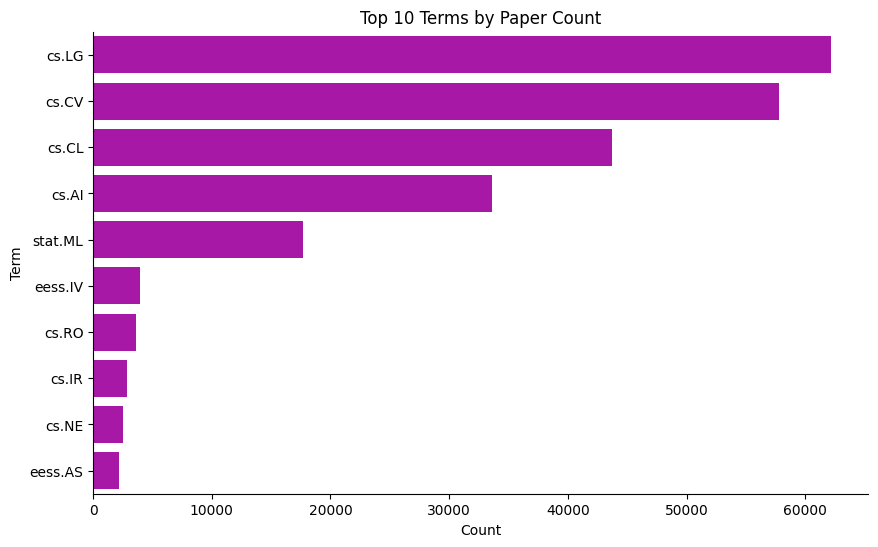

In [26]:
# Get all terms
all_terms = [term for sublist in arxiv_data['terms'].tolist() for term in sublist]

# Count terms
terms_count = Counter(all_terms)

# Create dataframe
df_terms = pd.DataFrame.from_dict(terms_count, orient='index').reset_index()
df_terms.columns = ['Term', 'Count']

# Sort by count and take the top 10
df_terms_top10 = df_terms.sort_values('Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Term', data=df_terms_top10, color='m' , saturation=0.75)

# Remove top and right spines
sns.despine()

plt.title('Top 10 Terms by Paper Count')
plt.show()

## Check for Duplicates

In [27]:
total_duplicate_titles = sum(arxiv_data["titles"].duplicated())
print(f"There are {total_duplicate_titles} duplicate titles.")

There are 47750 duplicate titles.


`Real-world data is noisy. One of the most commonly observed source of noise is data duplication. Here we notice that our initial dataset has got about 48k duplicate entries.`

## Word Cloud of Titles

In [16]:
# !pip install wordcloud

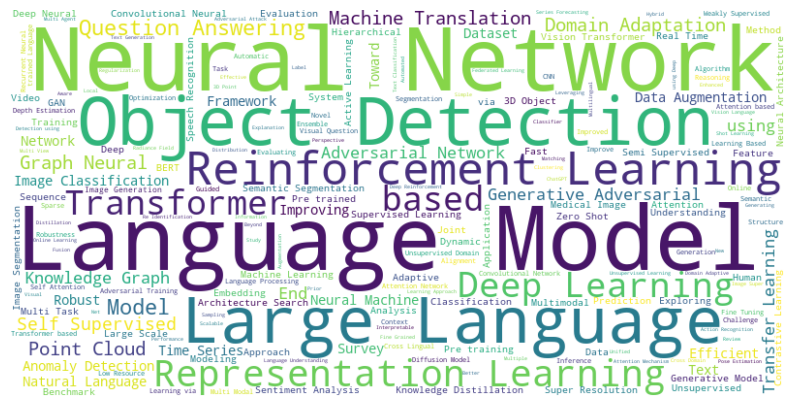

In [28]:
from wordcloud import WordCloud

# Concatenate all titles
all_titles = ' '.join(arxiv_data['titles'].tolist())

# Create word cloud
wordcloud = WordCloud(background_color = 'white', width=800, height=400).generate(all_titles)

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Lets drop the duplicate value and proceed

In [29]:
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()] #  It returns a new DataFrame that only contains the rows that are not duplicates.

print(f"Now there are {len(arxiv_data)}  rows in the dataset")

Now there are 87426  rows in the dataset


## Saved Filtered Data


In [92]:
arxiv_data.to_csv(PATH_DATA_BASE / 'Filtered_arxiv_papers.csv' ,index=False)

In [5]:
save_data = arxiv_data.copy()


<CENTER><h1>Approaches</h1>

<h2>We will be testing two approaches to recommend papers to a user.</h2>

<h4>1. The first approach is a content-based approach, where we will be recommending papers based on the similarity of their titles.</h4>
<h4>2. The second approach is also a content-based approach but we will be recommending papers based on the similarity of their abstract.</h4></CENTER>

# 1. CONTENT BASED APPROACH USING TITLES

### Lets begin exploring the first approach 

#### Since we are using Titles to reccomend the similar paper we will be droping rest of the columns from the data

In [6]:
titles_dataset = save_data.drop(columns=['abstracts'])

In [38]:
titles_dataset.head(10)

,titles,terms,urls,ids
0,Multispectral Image Segmentation in Agriculture: A Comprehensive Study on Fusion Approaches,[cs.CV],http://arxiv.org/abs/2308.00159v1,2308.00159v1
1,Investigating and Improving Latent Density Segmentation Models for Aleatoric Uncertainty Quantification in Medical Imaging,[cs.CV],http://arxiv.org/abs/2307.16694v1,2307.16694v1
2,DiffPose: SpatioTemporal Diffusion Model for Video-Based Human Pose Estimation,[cs.CV],http://arxiv.org/abs/2307.16687v1,2307.16687v1
3,Domain Adaptation for Medical Image Segmentation using Transformation-Invariant Self-Training,[cs.CV],http://arxiv.org/abs/2307.16660v1,2307.16660v1
4,3D Medical Image Segmentation with Sparse Annotation via Cross-Teaching between 3D and 2D Networks,[cs.CV],http://arxiv.org/abs/2307.16256v1,2307.16256v1
5,Compete to Win: Enhancing Pseudo Labels for Barely-supervised Medical Image Segmentation,[cs.CV],http://arxiv.org/abs/2304.07519v2,2304.07519v2
6,Exploring Feature Representation Learning for Semi-supervised Medical Image Segmentation,[cs.CV],http://arxiv.org/abs/2111.10989v2,2111.10989v2
7,ScribbleVC: Scribble-supervised Medical Image Segmentation with Vision-Class Embedding,"[cs.CV, cs.MM]",http://arxiv.org/abs/2307.16226v1,2307.16226v1
8,Unsupervised Model Adaptation for Source-free Segmentation of Medical Images,"[cs.CV, cs.LG]",http://arxiv.org/abs/2211.00807v2,2211.00807v2
9,CMX: Cross-Modal Fusion for RGB-X Semantic Segmentation with Transformers,"[cs.CV, cs.RO, eess.IV]",http://arxiv.org/abs/2203.04838v4,2203.04838v4


### Length of the titles

In [47]:
title_lengths = [len(title) for title in titles_dataset['titles']]

max_length = max(title_lengths)
min_length = min(title_lengths)
avg_length = sum(title_lengths) / len(title_lengths)


print(f"The maximum length of the title is: {max_length}")
print(50*'-')
print(f"The minimum length of the title is: {min_length}")
print(50*'-')
print(f"The average length of the titles is: {avg_length}")


The maximum length of the title is: 232
--------------------------------------------------
The minimum length of the title is: 7
--------------------------------------------------
The average length of the titles is: 74.05190675542745


### Function for plotting

In [48]:
def plot_length_distribution(df, column_name) -> None:
    """
    Plots a histogram representing the distribution of lengths in a specified column of a DataFrame. 
    The histogram also displays the mean length and one standard deviation above and below the mean.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column in the DataFrame for which to plot the length distribution.

    Returns:
        None. This function outputs a plot.
    """
    
    # Compute the lengths of all titles
    title_lengths = df[column_name].apply(len)

    # Calculate mean and standard deviation
    mean_length = title_lengths.mean()
    std_length = title_lengths.std()

    # Plot the histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(title_lengths, bins=50, color='b', alpha=0.2)

    # Add lines for the mean and standard deviation
    plt.axvline(mean_length, color='r', linestyle='-', linewidth=1.5)
    plt.axvline(mean_length - std_length, color='gray',
                linestyle='--', linewidth=1)
    plt.axvline(mean_length + std_length, color='gray',
                linestyle='--', linewidth=1)

    # Add a text box with the mean value
    plt.text(mean_length+5, plt.gca().get_ylim()
             [1]*0.9, f"Mean: {mean_length:.2f}", fontsize=10)

    plt.title('Distribution of ' + column_name.capitalize() + ' Lengths')
    plt.xlabel(column_name.capitalize() + ' Length')
    plt.ylabel('Frequency')
    plt.legend(['Mean', 'Standard Deviation'])
    plt.show()

In [49]:
def plot_top_words(df, column_name) -> None:
    """
    Plot the top 10 most common words in a specified column of a DataFrame.

    The function tokenizes the strings, converts to lower case, removes non-alphabetic tokens 
    and stop words, counts the frequency of each word, and then plots the 10 most common words 
    using a horizontal bar plot.

    Args:
        df (pd.DataFrame): The DataFrame containing the text data.
        column_name (str): The column of the DataFrame to analyze.

    Returns:
        None. The function shows a plot.
    """
    
    # Create a single string containing all sentences
    all_setences= " ".join(df[column_name].values)

    # Tokenize the string
    tokens = word_tokenize(all_setences)

    # Convert to lower case
    tokens = [word.lower() for word in tokens]

    # Remove non-alphabetic tokens and stop words
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    # Count the frequency of each word
    counter = Counter(words)

    # Get the 10 most common words
    most_common = counter.most_common(10)

    # Create a DataFrame from the most common words
    most_common_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])

    # Plot the results using seaborn
    plt.figure(figsize=(12,6))
    sns.barplot(y='Word', x='Frequency', data=most_common_df, palette='viridis', orient='h')
    
    # Change font size
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.title(f'Top 10 Words in {column_name} column', fontsize=16)
    plt.show()

### Distribution of Titles

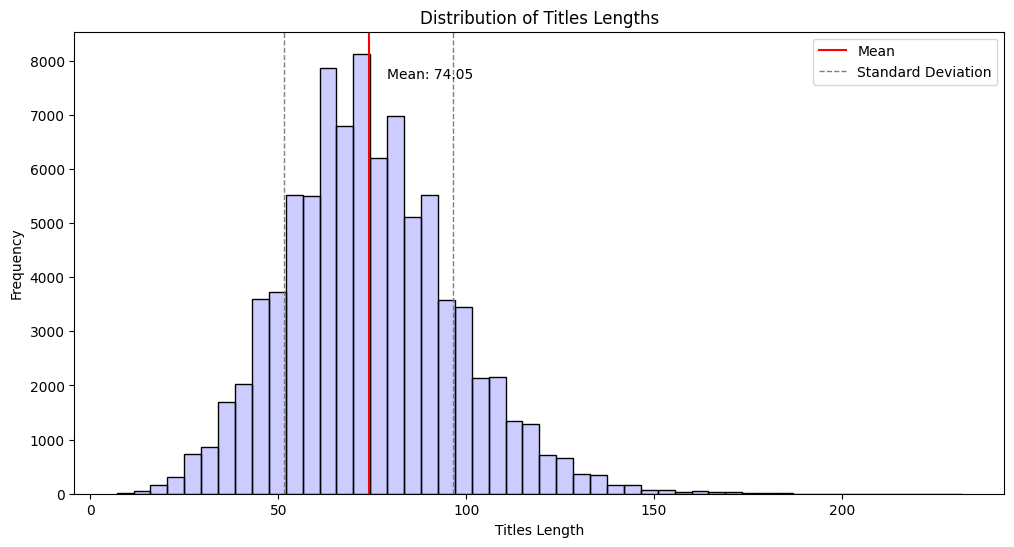

In [52]:
plot_length_distribution(titles_dataset, 'titles')

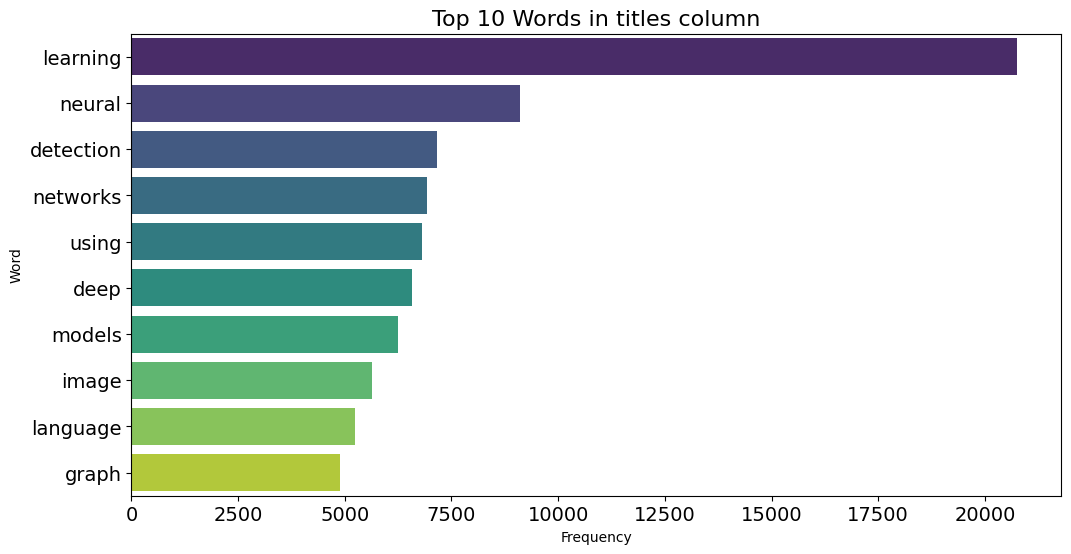

In [51]:
plot_top_words(titles_dataset, 'titles')

# 2. CONTENT BASED APPROACH USING ABSTRACTS

##### Since we are using abstracts , we will be droping titles columns 

In [13]:
abstracts_dataset = save_data.drop(columns=['titles'])

In [14]:
abstracts_dataset.head(10)

,abstracts,terms,urls,ids
0,"Multispectral imagery is frequently incorporated into agricultural tasks,\nproviding valuable support for applications such as image segmentation, crop\nmonitoring, field robotics, and yield estimation. From an image segmentation\nperspective, multispectral cameras can provide rich spectral information,\nhelping with noise reduction and feature extraction. As such, this paper\nconcentrates on the use of fusion approaches to enhance the segmentation\nprocess in agricultural applications. More specifically, in this work, we\ncompare different fusion approaches by combining RGB and NDVI as inputs for\ncrop row detection, which can be useful in autonomous robots operating in the\nfield. The inputs are used individually as well as combined at different times\nof the process (early and late fusion) to perform classical and DL-based\nsemantic segmentation. In this study, two agriculture-related datasets are\nsubjected to analysis using both deep learning (DL)-based and classical\nsegmentation methodologies. The experiments reveal that classical segmentation\nmethods, utilizing techniques such as edge detection and thresholding, can\neffectively compete with DL-based algorithms, particularly in tasks requiring\nprecise foreground-background separation. This suggests that traditional\nmethods retain their efficacy in certain specialized applications within the\nagricultural domain. Moreover, among the fusion strategies examined, late\nfusion emerges as the most robust approach, demonstrating superiority in\nadaptability and effectiveness across varying segmentation scenarios. The\ndataset and code is available at https://github.com/Cybonic/MISAgriculture.git.",['cs.CV'],http://arxiv.org/abs/2308.00159v1,2308.00159v1
1,"Data uncertainties, such as sensor noise or occlusions, can introduce\nirreducible ambiguities in images, which result in varying, yet plausible,\nsemantic hypotheses. In Machine Learning, this ambiguity is commonly referred\nto as aleatoric uncertainty. Latent density models can be utilized to address\nthis problem in image segmentation. The most popular approach is the\nProbabilistic U-Net (PU-Net), which uses latent Normal densities to optimize\nthe conditional data log-likelihood Evidence Lower Bound. In this work, we\ndemonstrate that the PU- Net latent space is severely inhomogenous. As a\nresult, the effectiveness of gradient descent is inhibited and the model\nbecomes extremely sensitive to the localization of the latent space samples,\nresulting in defective predictions. To address this, we present the Sinkhorn\nPU-Net (SPU-Net), which uses the Sinkhorn Divergence to promote homogeneity\nacross all latent dimensions, effectively improving gradient-descent updates\nand model robustness. Our results show that by applying this on public datasets\nof various clinical segmentation problems, the SPU-Net receives up to 11%\nperformance gains compared against preceding latent variable models for\nprobabilistic segmentation on the Hungarian-Matched metric. The results\nindicate that by encouraging a homogeneous latent space, one can significantly\nimprove latent density modeling for medical image segmentation.",['cs.CV'],http://arxiv.org/abs/2307.16694v1,2307.16694v1
2,"Denoising diffusion probabilistic models that were initially proposed for\nrealistic image generation have recently shown success in various perception\ntasks (e.g., object detection and image segmentation) and are increasingly\ngaining attention in computer vision. However, extending such models to\nmulti-frame human pose estimation is non-trivial due to the presence of the\nadditional temporal dimension in videos. More importantly, learning\nrepresentations that focus on keypoint regions is crucial for accurate\nlocalization of human joints. Nevertheless, the adaptation of the\ndiffusion-based methods remains unclear on how to achieve such objective. In\nthis paper, we present DiffPose, a novel diffusion architecture that fo

#### LENGTH OF THE ABSTRACTS

In [18]:
abstracts_dataset['abstract_length'] = abstracts_dataset['abstracts'].apply(len)
print(f"The length of the abstract is : {len(abstracts_dataset)}")

The length of the abstract is : 135176


In [19]:
abstracts_length = pd.DataFrame(abstracts_dataset['abstract_length'])

In [77]:
removed_indexes = abstracts_length.index[~abstracts_length.index.isin(filtered_abstracts.index)]
removed_indexes

Index([56864, 75475, 91944, 106964], dtype='int64')

#### Also removing from the original dataset where abstract length > 2700

In [ ]:
# Filter rows where abstract_length is greater than 2700
filtered_abstracts = abstracts_length[abstracts_length['abstract_length'] <= 2700]
len(filtered_abstracts)

In [89]:
# arxiv_data.drop(index = 56864 , inplace=True)
# arxiv_data.drop(index = 75475 , inplace=True)
# arxiv_data.drop(index = 91944 , inplace=True)
# arxiv_data.drop(index = 91944 , inplace=True)
arxiv_data.drop(index = 106964 , inplace=True)


In [26]:
# abstracts_dataset.drop(index = 56864 , inplace=True)
# abstracts_dataset.drop(index = 75475 , inplace=True)
# abstracts_dataset.drop(index = 91944 , inplace=True)
# abstracts_dataset.drop(index = 91944 , inplace=True)
abstracts_dataset.drop(index = 106964 , inplace=True)


### Min | Max Length of the abstracts

In [59]:
minimum_length = abstracts_dataset['abstract_length'].min()
maximum_length = abstracts_dataset['abstract_length'].max()

print('The minimum length of an abstract:', minimum_length)
print('The maximum length of an abstract:', maximum_length)

The minimum length of an abstract: 39
The maximum length of an abstract: 3309


In [61]:
average_abstract_length = int(abstracts_dataset['abstracts'].apply(len).mean())
print(f"The average text length of an abstract is {average_abstract_length} characters.")

The average text length of an abstract is 1198 characters.


In [63]:
abstracts_dataset.head()

,abstracts,terms,urls,ids,abstract_length
0,"Multispectral imagery is frequently incorporated into agricultural tasks,\nproviding valuable support for applications such as image segmentation, crop\nmonitoring, field robotics, and yield estimation. From an image segmentation\nperspective, multispectral cameras can provide rich spectral information,\nhelping with noise reduction and feature extraction. As such, this paper\nconcentrates on the use of fusion approaches to enhance the segmentation\nprocess in agricultural applications. More specifically, in this work, we\ncompare different fusion approaches by combining RGB and NDVI as inputs for\ncrop row detection, which can be useful in autonomous robots operating in the\nfield. The inputs are used individually as well as combined at different times\nof the process (early and late fusion) to perform classical and DL-based\nsemantic segmentation. In this study, two agriculture-related datasets are\nsubjected to analysis using both deep learning (DL)-based and classical\nsegmentation methodologies. The experiments reveal that classical segmentation\nmethods, utilizing techniques such as edge detection and thresholding, can\neffectively compete with DL-based algorithms, particularly in tasks requiring\nprecise foreground-background separation. This suggests that traditional\nmethods retain their efficacy in certain specialized applications within the\nagricultural domain. Moreover, among the fusion strategies examined, late\nfusion emerges as the most robust approach, demonstrating superiority in\nadaptability and effectiveness across varying segmentation scenarios. The\ndataset and code is available at https://github.com/Cybonic/MISAgriculture.git.",[cs.CV],http://arxiv.org/abs/2308.00159v1,2308.00159v1,1657
1,"Data uncertainties, such as sensor noise or occlusions, can introduce\nirreducible ambiguities in images, which result in varying, yet plausible,\nsemantic hypotheses. In Machine Learning, this ambiguity is commonly referred\nto as aleatoric uncertainty. Latent density models can be utilized to address\nthis problem in image segmentation. The most popular approach is the\nProbabilistic U-Net (PU-Net), which uses latent Normal densities to optimize\nthe conditional data log-likelihood Evidence Lower Bound. In this work, we\ndemonstrate that the PU- Net latent space is severely inhomogenous. As a\nresult, the effectiveness of gradient descent is inhibited and the model\nbecomes extremely sensitive to the localization of the latent space samples,\nresulting in defective predictions. To address this, we present the Sinkhorn\nPU-Net (SPU-Net), which uses the Sinkhorn Divergence to promote homogeneity\nacross all latent dimensions, effectively improving gradient-descent updates\nand model robustness. Our results show that by applying this on public datasets\nof various clinical segmentation problems, the SPU-Net receives up to 11%\nperformance gains compared against preceding latent variable models for\nprobabilistic segmentation on the Hungarian-Matched metric. The results\nindicate that by encouraging a homogeneous latent space, one can significantly\nimprove latent density modeling for medical image segmentation.",[cs.CV],http://arxiv.org/abs/2307.16694v1,2307.16694v1,1415
2,"Denoising diffusion probabilistic models that were initially proposed for\nrealistic image generation have recently shown success in various perception\ntasks (e.g., object detection and image segmentation) and are increasingly\ngaining attention in computer vision. However, extending such models to\nmulti-frame human pose estimation is non-trivial due to the presence of the\nadditional temporal dimension in videos. More importantly, learning\nrepresentations that focus on keypoint regions is crucial for accurate\nlocalization of human joints. Nevertheless, the adaptation of the\ndiffusion-based methods remains unclear on how to achieve such objective. In\nthis paper, we present DiffPose, a novel diffusio

In [65]:
# Find the maximum abstract length
max_length = abstracts_dataset['abstract_length'].max()

# Initialize a variable to store the second maximum abstract length
second_max_length = None

# Iterate through the abstract lengths
for length in abstracts_dataset['abstract_length']:
    # If the length is not the maximum length and it is greater than the second maximum length
    if length != max_length and (second_max_length is None or length > second_max_length):
        # Set the second maximum length to the length
        second_max_length = length

# Print the second maximum abstract length
print(f"The second maximum abstract length is: {second_max_length}")

The second maximum abstract length is: 3260


In [67]:
# Get the maximum abstract content
max_abstract = abstracts_dataset['abstracts'].max()

# Print the index of the maximum abstract content
for i in range(0, len(abstracts_dataset)):
    if abstracts_dataset['abstracts'].iloc[i] == max_abstract:
        print("Index- ", i)

Index-  61934


### Min / Max after filtering

In [32]:
minimum_length = filtered_abstracts['abstract_length'].min()
maximum_length = filtered_abstracts['abstract_length'].max()

print('The minimum length of an abstract:', minimum_length)
print('The maximum length of an abstract:', maximum_length)

The minimum length of an abstract: 39
The maximum length of an abstract: 2573


In [36]:
average_abstract_length = int(abstracts_dataset['abstracts'].apply(len).mean())
print(f"The average text length of an abstract is {average_abstract_length} characters.")

The average text length of an abstract is 1218 characters.


In [34]:
filtered_abstracts = filtered_abstracts.sort_values(by="abstract_length", ascending=False)
filtered_abstracts.head()

,abstract_length
116400,2573
78448,2327
24242,2327
37433,2327
4075,2327


# Observations
- The average text length of an abstract is `1218 ` characters, and its maximum length is `2573` characters. So the best choice is to use a `sentence-transformer model` with a Max Sequence Length capability of over `2790` characters.

- Unfortunately, most pre-trained models have a Max Sequence Length of `512`. The transformer model just won't be able to process the entire abstract at once due to its max length constraint, so it processes as much as it can, which in this case is the first `512` words.

- A naive approach would be to split the document into chunks, encode each chunk separately and then combine these encodings for a final document-level representation. For example, split a document into sentences, encode each sentence independently and then combine these sentence vectors (e.g., averaging, max-pooling, etc.) for a document representation.

- Another approach would be to use a `"sliding window"`. Instead of just taking the first `512 words`, I could apply a `"sliding window"` approach where I first process the first `512` words, then the next `512` words (perhaps with some overlap), and so on until I've processed the whole abstract.


- I will first be encoding paper's titles to calculate the similarity. Abstracts will be encoded later on.